In [1]:
from src.data_processing import *
#from src.phonemes_stats import *
from src.wav2vec2_french_phonemizer import *

os.environ['DYLD_LIBRARY_PATH'] = '/opt/homebrew/lib'

In [2]:
# We prepare the test data
test_df = prepare_readingTest_data()
test_df.head()

,id,dateOfTest,testParameters,parametersType,testResults,testType,experimentResults,childId,evaluationResults,day,extracted_subtype
0,2AACA972-A244-4E75-A4AD-2E052CD5A4B1,2024-04-29 06:37:20.368536+00:00,"{'duration': 120.0, 'textSize': 25.0, 'nonWord...",experiment,{'recording': b'\x00\x00\x00\x1cftypM4A \x00\x...,readingTestNonWords,"{'experimentPhase': 'preTestPhase', 'experimen...",0ED01FB8-8212-4D4A-BE3E-D6B6E591EE4E,"{'wordsState': [{'Femme': 'Incorrect'}, {'Hier...",2024-04-29 00:00:00+00:00,Irréguliers_readingTestNonWords
1,6B905631-C4A5-4E92-97B3-B932FD8DD73F,2024-04-29 07:05:14.552932+00:00,"{'duration': 80.0, 'textSize': 20.0, 'nonWordS...",experiment,{'recording': b'\x00\x00\x00\x1cftypM4A \x00\x...,readingTestNonWords,"{'experimentPhase': 'postTestPhase', 'experime...",0ED01FB8-8212-4D4A-BE3E-D6B6E591EE4E,"{'wordsState': [{'Il': 'Correct'}, {'un': 'Cor...",2024-04-29 00:00:00+00:00,LUM_readingTestNonWords
2,79055215-1979-42D3-9B26-B9C6DD935D83,2024-04-29 06:35:43.691463+00:00,"{'duration': 80.0, 'textSelected': {'text': ""C...",experiment,{'recording': b'\x00\x00\x00\x1cftypM4A \x00\x...,readingTestFluencE,"{'experimentPhase': 'preTestPhase', 'experimen...",0ED01FB8-8212-4D4A-BE3E-D6B6E591EE4E,"{'wordsState': [{'C'est': 'Incorrect'}, {'l'hi...",2024-04-29 00:00:00+00:00,None_readingTestFluencE
3,F639F673-A88D-49C7-AC75-5360FB939130,2024-04-29 06:51:14.092154+00:00,"{'fileName': 'bell_test_data', 'duration': 120.0}",experiment,{'selectedItems': [{'positionY': 0.06677796327...,testBell,"{'experimentPhase': 'preTestPhase', 'experimen...",0ED01FB8-8212-4D4A-BE3E-D6B6E591EE4E,None,2024-04-29 00:00:00+00:00,None_testBell
4,BA62E2B5-EB3A-4B6A-9B5E-7A488B5E015F,2024-04-29 06:39:15.372241+00:00,"{'duration': 120.0, 'textSize': 25.0, 'nonWord...",experiment,{'recording': b'\x00\x00\x00\x1cftypM4A \x00\x...,readingTestNonWords,"{'experimentPhase': 'preTestPhase', 'experimen...",0ED01FB8-8212-4D4A-BE3E-D6B6E591EE4E,"{'wordsState': [{'Sande': 'Correct'}, {'Chon':...",2024-04-29 00:00:00+00:00,Pseudomots_readingTestNonWords


## Statistics about the children

In [3]:
# We extract the number of different childId and group the dataframe by childId
print(f"There are {test_df['childId'].nunique()} different children in the test set")

There are 46 different children in the test set


## Statistics about the phoneme repartition

In [4]:
# We extract all the test id for readingTestFluencE
tests_id = test_df[test_df['testType'] == 'readingTestFluencE']['id'].unique()

# TODO: Uncomment the following line to run the wav2vec2-french-phonemizer model on all the readingTestFluencE tests
# We run the wav2vec2-french-phonemizer model on all the readingTestFluencE tests
top_3_phoneme_transcriptions_with_proba(
    folder_path='wav_files/readingTestFluencE', 
    test_type='readingTestFluencE', 
    output_folder='transcriptions/readingTestFluencE/wav2vec2-french-phonemizer', 
    tests_id=tests_id,
    model_id='Cnam-LMSSC/wav2vec2-french-phonemizer'
    )

Filtered top-3 phoneme transcriptions saved to transcriptions/readingTestFluencE/wav2vec2-french-phonemizer/readingTestFluencE_79055215-1979-42D3-9B26-B9C6DD935D83_phonemes.csv
Filtered top-3 phoneme transcriptions saved to transcriptions/readingTestFluencE/wav2vec2-french-phonemizer/readingTestFluencE_3D4319B1-C861-4DB8-8EFF-BDB93392C1D3_phonemes.csv
Filtered top-3 phoneme transcriptions saved to transcriptions/readingTestFluencE/wav2vec2-french-phonemizer/readingTestFluencE_B73F92E3-A032-43FF-B027-9954267C6298_phonemes.csv
Filtered top-3 phoneme transcriptions saved to transcriptions/readingTestFluencE/wav2vec2-french-phonemizer/readingTestFluencE_99EB8804-8099-428C-864B-A0E89012F3AA_phonemes.csv
Filtered top-3 phoneme transcriptions saved to transcriptions/readingTestFluencE/wav2vec2-french-phonemizer/readingTestFluencE_8EFA264B-8CFC-4CDD-B910-F07C4FCB2B66_phonemes.csv
Filtered top-3 phoneme transcriptions saved to transcriptions/readingTestFluencE/wav2vec2-french-phonemizer/reading

In [5]:
# TODO: Uncomment the following line to run the phonemizer-wav2vec2-ctc-french model on all the readingTestFluencE tests
# We run the phonemizer-wav2vec2-ctc-french model on all the readingTestFluencE tests
top_3_phoneme_transcriptions_with_proba(
    folder_path='wav_files/readingTestFluencE', 
    test_type='readingTestFluencE', 
    output_folder='transcriptions/readingTestFluencE/phonemizer-wav2vec2-ctc-french', 
    tests_id=tests_id,
    model_id='bofenghuang/phonemizer-wav2vec2-ctc-french'
)

model.safetensors:   8%|8         | 105M/1.26G [00:00<?, ?B/s]

preprocessor_config.json:   0%|          | 0.00/256 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/1.09k [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/587 [00:00<?, ?B/s]

added_tokens.json:   0%|          | 0.00/30.0 [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/546 [00:00<?, ?B/s]

Filtered top-3 phoneme transcriptions saved to transcriptions/readingTestFluencE/phonemizer-wav2vec2-ctc-french/readingTestFluencE_79055215-1979-42D3-9B26-B9C6DD935D83_phonemes.csv
Filtered top-3 phoneme transcriptions saved to transcriptions/readingTestFluencE/phonemizer-wav2vec2-ctc-french/readingTestFluencE_3D4319B1-C861-4DB8-8EFF-BDB93392C1D3_phonemes.csv
Filtered top-3 phoneme transcriptions saved to transcriptions/readingTestFluencE/phonemizer-wav2vec2-ctc-french/readingTestFluencE_B73F92E3-A032-43FF-B027-9954267C6298_phonemes.csv
Filtered top-3 phoneme transcriptions saved to transcriptions/readingTestFluencE/phonemizer-wav2vec2-ctc-french/readingTestFluencE_99EB8804-8099-428C-864B-A0E89012F3AA_phonemes.csv
Filtered top-3 phoneme transcriptions saved to transcriptions/readingTestFluencE/phonemizer-wav2vec2-ctc-french/readingTestFluencE_8EFA264B-8CFC-4CDD-B910-F07C4FCB2B66_phonemes.csv
Filtered top-3 phoneme transcriptions saved to transcriptions/readingTestFluencE/phonemizer-wav

In [6]:
# TODO: Uncomment the following line to run the wav2vec2-Phoneme model on all the readingTestFluencE tests
# We run the wav2vec2-Phoneme model on all the readingTestFluencE tests
top_3_phoneme_transcriptions_with_proba(
    folder_path='wav_files/readingTestFluencE', 
    test_type='readingTestFluencE', 
    output_folder='transcriptions/readingTestFluencE/wav2vec2-Phoneme', 
    tests_id=tests_id,
    model_id='Bluecast/wav2vec2-Phoneme'
)

config.json:   0%|          | 0.00/2.34k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/1.26G [00:00<?, ?B/s]

preprocessor_config.json:   0%|          | 0.00/214 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/1.05k [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/298 [00:00<?, ?B/s]

added_tokens.json:   0%|          | 0.00/30.0 [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/96.0 [00:00<?, ?B/s]

Filtered top-3 phoneme transcriptions saved to transcriptions/readingTestFluencE/wav2vec2-Phoneme/readingTestFluencE_79055215-1979-42D3-9B26-B9C6DD935D83_phonemes.csv
Filtered top-3 phoneme transcriptions saved to transcriptions/readingTestFluencE/wav2vec2-Phoneme/readingTestFluencE_3D4319B1-C861-4DB8-8EFF-BDB93392C1D3_phonemes.csv
Filtered top-3 phoneme transcriptions saved to transcriptions/readingTestFluencE/wav2vec2-Phoneme/readingTestFluencE_B73F92E3-A032-43FF-B027-9954267C6298_phonemes.csv
Filtered top-3 phoneme transcriptions saved to transcriptions/readingTestFluencE/wav2vec2-Phoneme/readingTestFluencE_99EB8804-8099-428C-864B-A0E89012F3AA_phonemes.csv
Filtered top-3 phoneme transcriptions saved to transcriptions/readingTestFluencE/wav2vec2-Phoneme/readingTestFluencE_8EFA264B-8CFC-4CDD-B910-F07C4FCB2B66_phonemes.csv
Filtered top-3 phoneme transcriptions saved to transcriptions/readingTestFluencE/wav2vec2-Phoneme/readingTestFluencE_42BA95A4-17B7-4F77-8419-972DBEBF23C9_phonemes.cs

### Without the phoneme probabilities

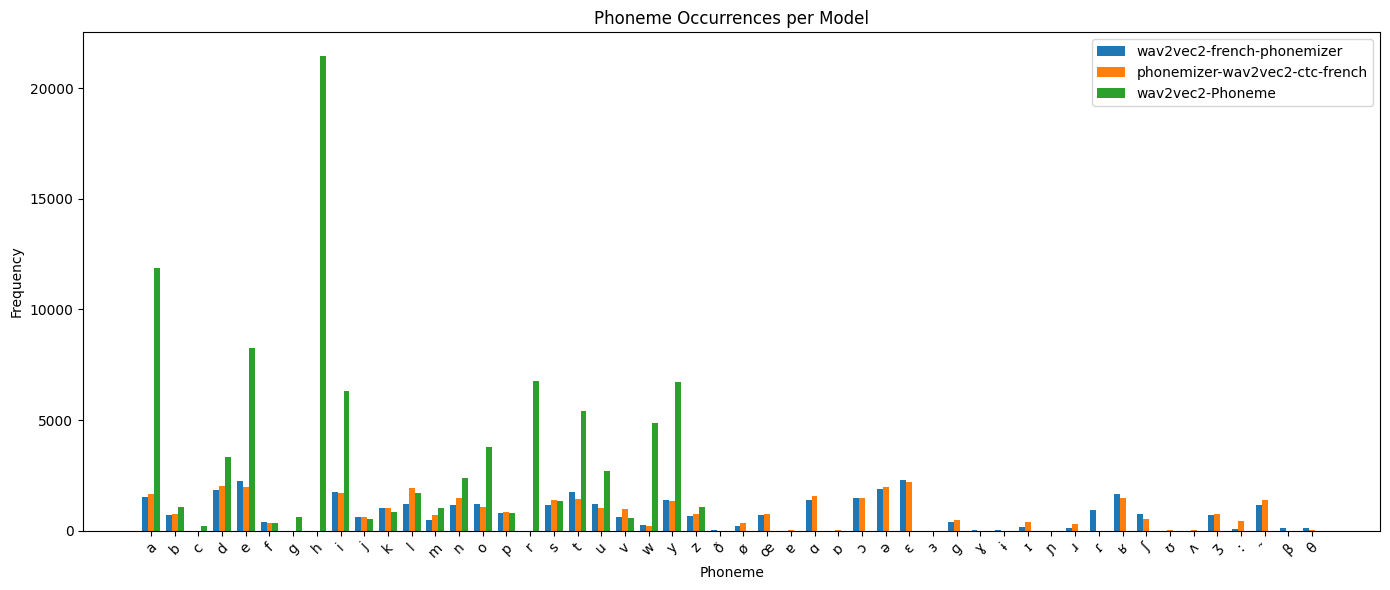

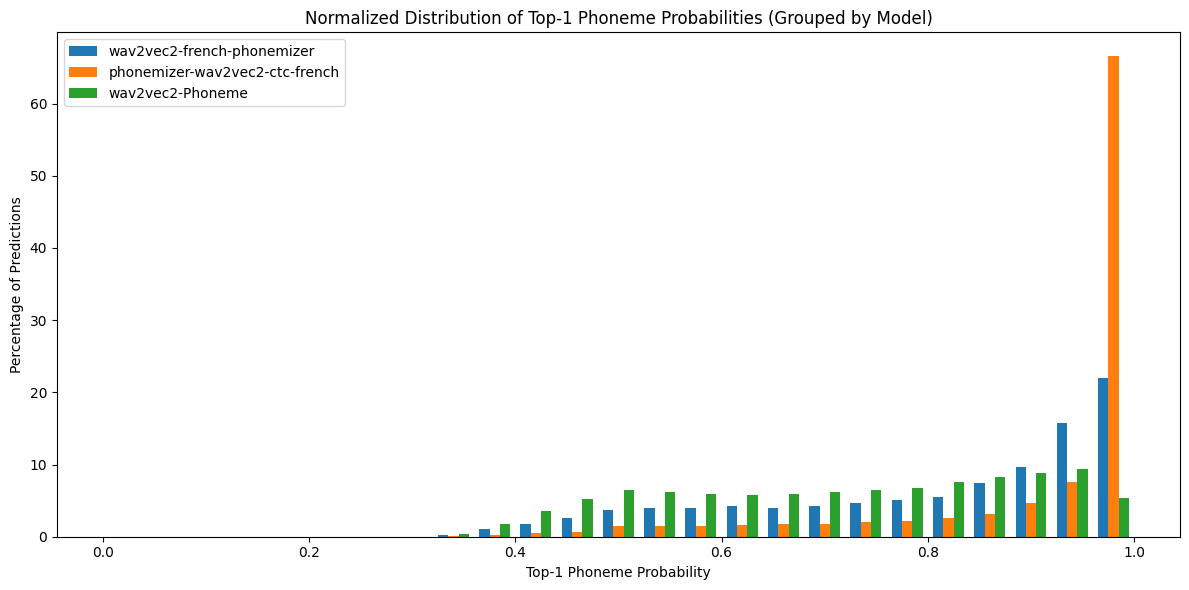

In [16]:
import os
import csv
from collections import defaultdict
import statistics
import matplotlib.pyplot as plt
import numpy as np

def analyze_phoneme_statistics(folder_path):
    phoneme_counts = defaultdict(int)
    phoneme_probs = defaultdict(list)
    top1_probs = []

    for filename in os.listdir(folder_path):
        if filename.endswith(".csv"):
            file_path = os.path.join(folder_path, filename)
            with open(file_path, newline='', encoding='utf-8') as csvfile:
                reader = csv.DictReader(csvfile)
                for row in reader:
                    for i in range(1, 4):  # Phoneme1, Phoneme2, Phoneme3
                        phoneme = row[f"Phoneme{i}"]
                        if phoneme in ("[PAD]", "|"):  # ✅ Exclude '[PAD]' and '|'
                            continue
                        prob = float(row[f"Prob{i}"])
                        phoneme_counts[phoneme] += 1
                        phoneme_probs[phoneme].append(prob)

                    if row["Phoneme1"] not in ("[PAD]", "|"):
                        top1_probs.append(float(row["Prob1"]))

    phoneme_stats = {
        p: {
            "count": phoneme_counts[p],
            "avg_prob": statistics.mean(phoneme_probs[p]),
            "min_prob": min(phoneme_probs[p]),
            "max_prob": max(phoneme_probs[p])
        } for p in phoneme_probs
    }

    return phoneme_stats, top1_probs

# Paths to the three models
models = {
    "wav2vec2-french-phonemizer": "transcriptions/readingTestFluencE/wav2vec2-french-phonemizer",
    "phonemizer-wav2vec2-ctc-french": "transcriptions/readingTestFluencE/phonemizer-wav2vec2-ctc-french",
    "wav2vec2-Phoneme": "transcriptions/readingTestFluencE/wav2vec2-Phoneme"
}

# Collect statistics
all_stats = {}
for model_name, folder in models.items():
    phoneme_stats, top1_probs = analyze_phoneme_statistics(folder)
    all_stats[model_name] = {"phoneme_stats": phoneme_stats, "top1_probs": top1_probs}

# ===== Plot 1: Phoneme frequency comparison =====
all_phonemes = sorted(set(p for stats in all_stats.values() for p in stats["phoneme_stats"]))
x = range(len(all_phonemes))
width = 0.25

plt.figure(figsize=(14, 6))

for i, (model_name, stats) in enumerate(all_stats.items()):
    counts = [stats["phoneme_stats"].get(p, {}).get("count", 0) for p in all_phonemes]
    plt.bar([xi + i * width for xi in x], counts, width=width, label=model_name)

plt.xticks([xi + width for xi in x], all_phonemes, rotation=45)
plt.xlabel("Phoneme")
plt.ylabel("Frequency")
plt.title("Phoneme Occurrences per Model")
plt.legend()
plt.tight_layout()
plt.show()

# ===== Plot 2: Normalized top-1 probability histograms with offset bars =====
plt.figure(figsize=(12, 6))

# Shared bin edges and width
bins = np.linspace(0, 1, 26)  # 25 bins
bin_centers = (bins[:-1] + bins[1:]) / 2
bin_width = bins[1] - bins[0]
bar_width = bin_width / 4  # narrower bars for visual clarity

model_names = list(all_stats.keys())
colors = ['#1f77b4', '#ff7f0e', '#2ca02c']  # consistent color scheme

# Compute and plot histograms
for i, model_name in enumerate(model_names):
    top1_probs = all_stats[model_name]["top1_probs"]
    hist, _ = np.histogram(top1_probs, bins=bins, density=False)
    total = sum(hist)
    percentages = (hist / total * 100) if total > 0 else np.zeros_like(hist)

    # Offset each model's bars within the bin
    x_positions = bin_centers + (i - 1) * bar_width
    plt.bar(x_positions, percentages, width=bar_width, label=model_name, color=colors[i])

plt.xlabel("Top-1 Phoneme Probability")
plt.ylabel("Percentage of Predictions")
plt.title("Normalized Distribution of Top-1 Phoneme Probabilities (Grouped by Model)")
plt.legend()
plt.tight_layout()
plt.show()

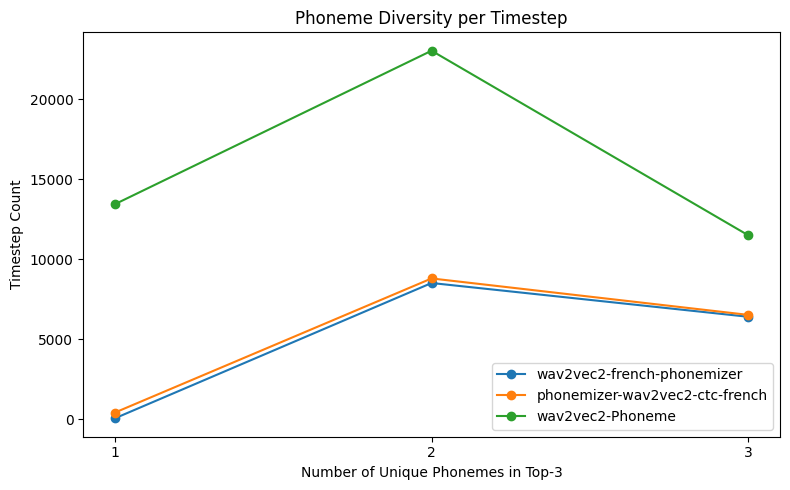

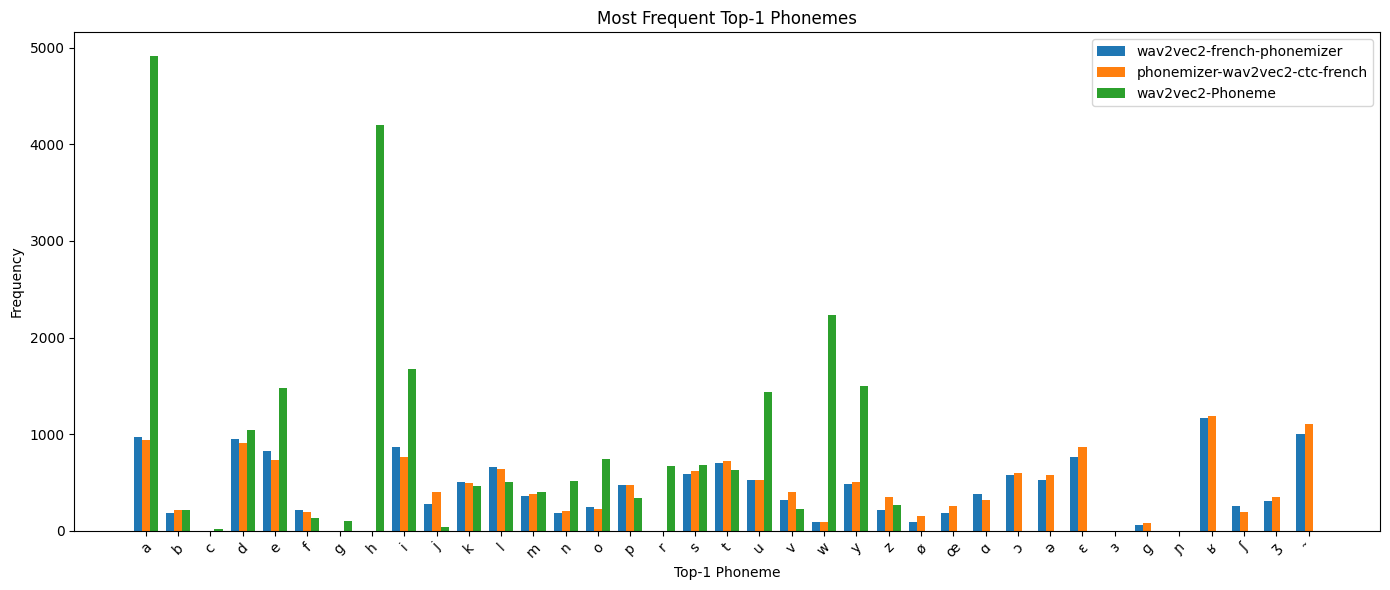

In [17]:
import os
import csv
from collections import defaultdict, Counter
import statistics
import matplotlib.pyplot as plt

def analyze_phoneme_diversity_and_top1(folder_path):
    diversity_counts = Counter()  # key = num unique phonemes per timestep
    top1_phoneme_counts = Counter()

    for filename in os.listdir(folder_path):
        if filename.endswith(".csv"):
            file_path = os.path.join(folder_path, filename)
            with open(file_path, newline='', encoding='utf-8') as csvfile:
                reader = csv.DictReader(csvfile)
                for row in reader:
                    # Exclude '|'
                    phonemes = [row[f"Phoneme{i}"] for i in range(1, 4) if row[f"Phoneme{i}"] not in ("[PAD]", "|")]
                    unique_count = len(set(phonemes))
                    diversity_counts[unique_count] += 1

                    top1 = row["Phoneme1"]
                    if top1 not in ("[PAD]", "|"):  # Exclude top1 phoneme if it's '|'
                        top1_phoneme_counts[top1] += 1

    return diversity_counts, top1_phoneme_counts

# === Run analysis for all models ===
# Paths to the three models
models = {
    "wav2vec2-french-phonemizer": "transcriptions/readingTestFluencE/wav2vec2-french-phonemizer",
    "phonemizer-wav2vec2-ctc-french": "transcriptions/readingTestFluencE/phonemizer-wav2vec2-ctc-french",
    "wav2vec2-Phoneme": "transcriptions/readingTestFluencE/wav2vec2-Phoneme"
}

all_diversity = {}
all_top1_counts = {}

for model_name, folder in models.items():
    diversity, top1_counts = analyze_phoneme_diversity_and_top1(folder)
    all_diversity[model_name] = diversity
    all_top1_counts[model_name] = top1_counts

# === Plot 1: Per-Timestep Diversity ===
plt.figure(figsize=(8, 5))

for model_name, diversity in all_diversity.items():
    x = sorted(diversity)
    y = [diversity[i] for i in x]
    plt.plot(x, y, marker='o', label=model_name)

plt.xlabel("Number of Unique Phonemes in Top-3")
plt.ylabel("Timestep Count")
plt.title("Phoneme Diversity per Timestep")
plt.legend()
plt.xticks([1, 2, 3])
plt.tight_layout()
plt.show()

# === Plot 2: Top-1 Phoneme Frequency ===
# Get union of all top-1 phonemes
all_top1_phonemes = sorted(set(p for counts in all_top1_counts.values() for p in counts))

plt.figure(figsize=(14, 6))
width = 0.25
x = range(len(all_top1_phonemes))

for i, (model_name, counts) in enumerate(all_top1_counts.items()):
    freqs = [counts.get(p, 0) for p in all_top1_phonemes]
    offset = [xi + i * width for xi in x]
    plt.bar(offset, freqs, width=width, label=model_name)

plt.xticks([xi + width for xi in x], all_top1_phonemes, rotation=45)
plt.xlabel("Top-1 Phoneme")
plt.ylabel("Frequency")
plt.title("Most Frequent Top-1 Phonemes")
plt.legend()
plt.tight_layout()
plt.show()
